## SUBJECT


Project Phase 1 Submission (Nov 28) Devoir

Submit your intermediate project solution, which must include:

    Data Exploratory Analysis & Unsupervised Exploration
    Data preprocessing, preparation & train-val-test splits
    Baseline results with basic Linear & Ensemble Models



## IMPORTS

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans

dataset = pd.read_csv("https://raw.githubusercontent.com/Ariazoox/Flight-Price-Prediction-ML/main/Clean_Dataset.csv")

## 1 - LOAD & EXPLORE DATA


In [71]:
print("\n=== HEAD ===")
display(dataset.head())

print("\n=== INFO ===")
print(dataset.info())

print("\n=== DESCRIPTION ===")
display(dataset.describe())

print("\n=== VALUE COUNTS (Airline) ===")
display(dataset["airline"].value_counts())


=== HEAD ===


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955



=== INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB
None

=== DESCRIPTION ===


,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000



=== VALUE COUNTS (Airline) ===


,count
airline,
Vistara,127859
Air_India,80892
Indigo,43120
GO_FIRST,23173
AirAsia,16098
SpiceJet,9011


**1.1 - DATA EXPLORATORY ANALYSIS (EDA)**


 Distribution du prix (USD)


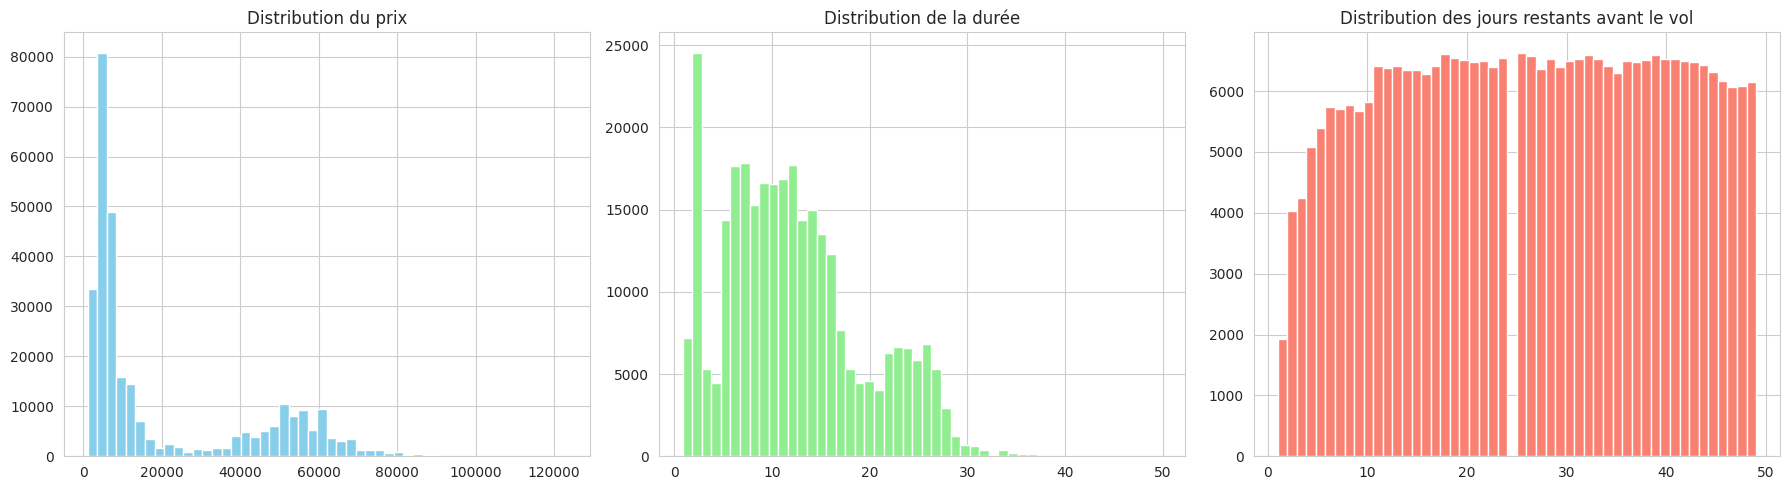


 Prix selon la classe (USD)


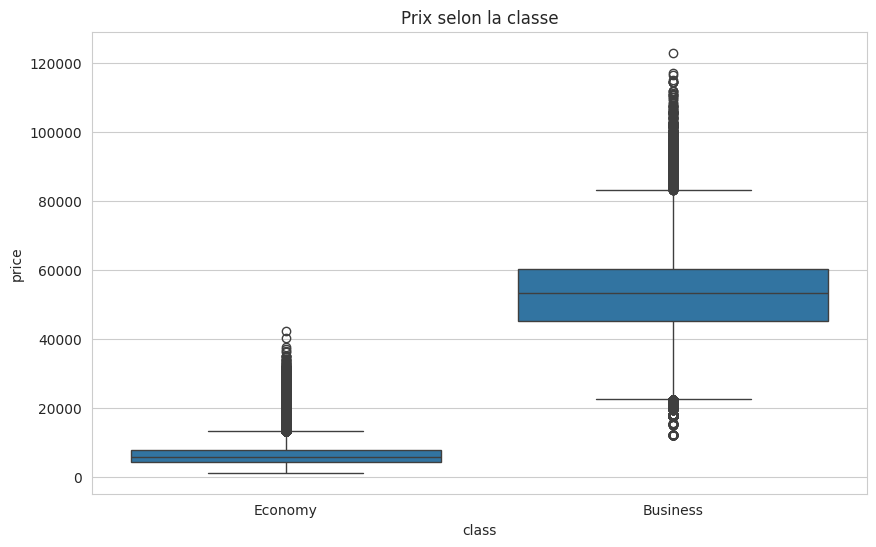


 Prix selon la compagnie aérienne (USD)


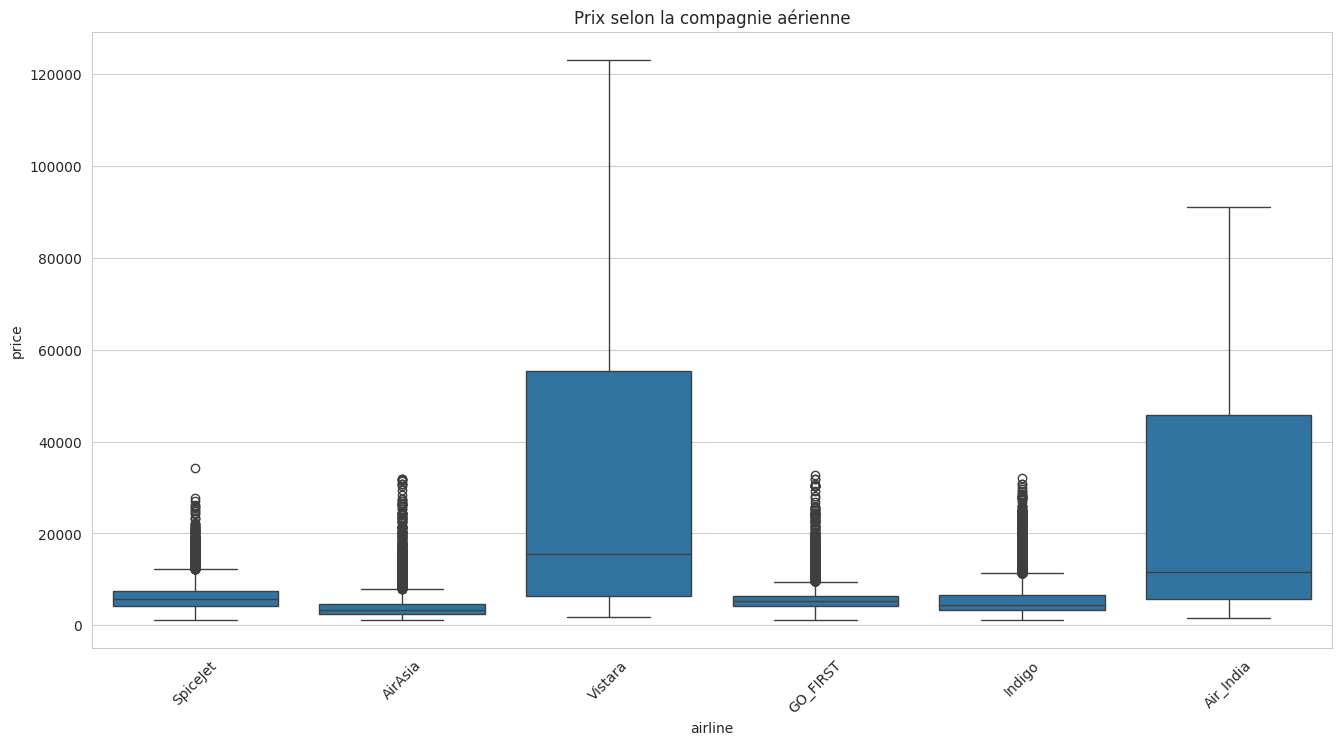


 Durée du vol vs Prix (USD)


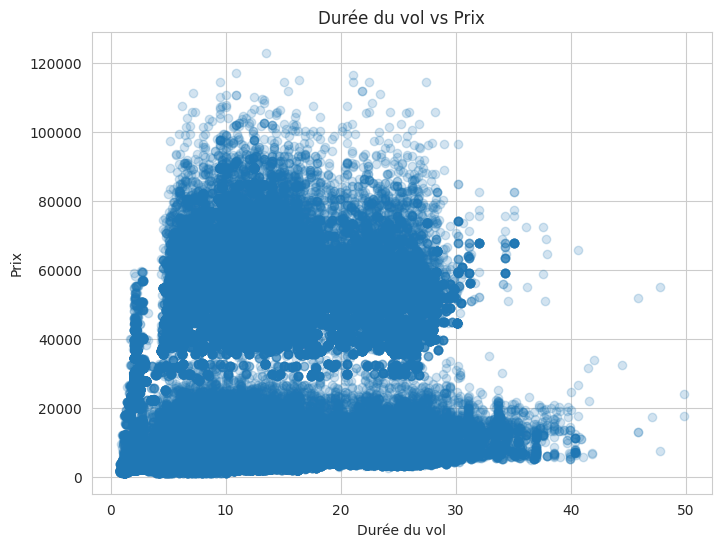

In [72]:
print("\n Distribution du prix (USD)")
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

dataset['price'].hist(ax=axs[0], bins=50, color='skyblue')
axs[0].set_title('Distribution du prix')

dataset['duration'].hist(ax=axs[1], bins=50, color='lightgreen')
axs[1].set_title('Distribution de la durée')

dataset['days_left'].hist(ax=axs[2], bins=50, color='salmon')
axs[2].set_title('Distribution des jours restants avant le vol')

plt.tight_layout()
plt.show()


# =========================================
# BOXPLOT : Prix selon la classe
# =========================================

print("\n Prix selon la classe (USD)")
plt.figure(figsize=(10,6))
sns.boxplot(x='class', y='price', data=dataset)
plt.title('Prix selon la classe')
plt.show()


# =========================================
# BOXPLOT : Prix selon la compagnie aérienne
# =========================================

print("\n Prix selon la compagnie aérienne (USD)")
plt.figure(figsize=(16,8))
sns.boxplot(x='airline', y='price', data=dataset)
plt.xticks(rotation=45)
plt.title('Prix selon la compagnie aérienne')
plt.show()


# =========================================
# SCATTER : Durée vs Prix
# =========================================

print("\n Durée du vol vs Prix (USD)")
plt.figure(figsize=(8,6))
plt.scatter(dataset['duration'], dataset['price'], alpha=0.2)
plt.xlabel('Durée du vol')
plt.ylabel('Prix')
plt.title('Durée du vol vs Prix')
plt.show()

**1.2 UNSUPERVISED EXPLORATION**


=== UNSUPERVISED EXPLORATION (KMeans simple) ===


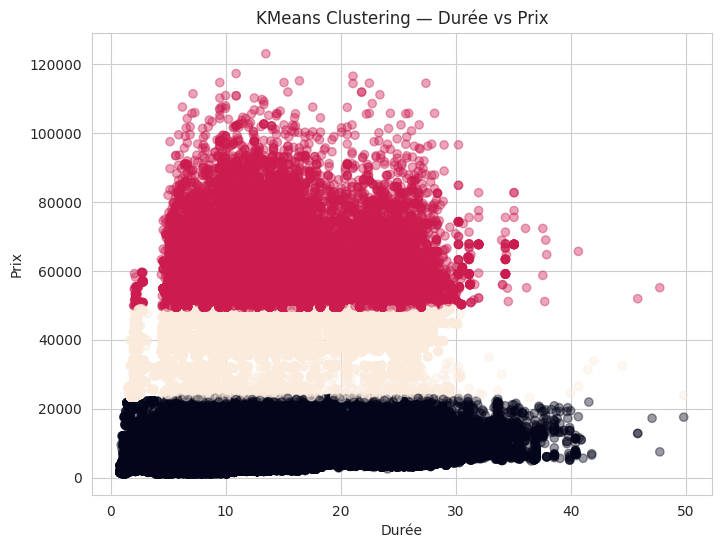

In [74]:
print("\n=== UNSUPERVISED EXPLORATION (KMeans simple) ===")

X_unsup = dataset[['duration', 'price']]

kmeans = KMeans(n_clusters=3, random_state=42)
dataset["cluster"] = kmeans.fit_predict(X_unsup)

plt.figure(figsize=(8,6))
plt.scatter(dataset['duration'], dataset['price'], c=dataset['cluster'], alpha=0.4)
plt.xlabel("Durée")
plt.ylabel("Prix")
plt.title("KMeans Clustering — Durée vs Prix")
plt.show()

## 2. PREPROCESSING

**2.1 Features & Target**

In [75]:
feature_names = [
    "airline", "flight", "source_city", "departure_time", "stops",
    "arrival_time", "destination_city", "class",
    "duration", "days_left"
]
target_name = "price"

dataset = dataset[feature_names + [target_name]]
data = dataset[feature_names]
target = dataset[target_name]

**2.2 Train / Test Split**

In [64]:
data_train, data_test, target_train, target_test = train_test_split(
    data, target, test_size=0.2, random_state=42
)

**2.3 Feature groups**

In [65]:
numerical_features = ["duration", "days_left"]

ordinal_features = ["class", "departure_time", "arrival_time"]

categorical_features = [
    col for col in data.columns
    if data[col].dtype == "object" and col not in ordinal_features
]


**2.4 PREPROCESSING PIPELINE**

In [66]:
pipeline_num = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
])

pipeline_ord = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)),
])

pipeline_cat = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)),
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", pipeline_num, numerical_features),
        ("ord", pipeline_ord, ordinal_features),
        ("cat", pipeline_cat, categorical_features),
    ]
)

## 3. BASELINE MODELS

**3.1 Linear Regression**


=== Linear Regression — Cross Validation ===
Train Score (mean): 0.904634887790874
Validation Score (mean): 0.904619229247869
Test Score: 0.9045747367508341


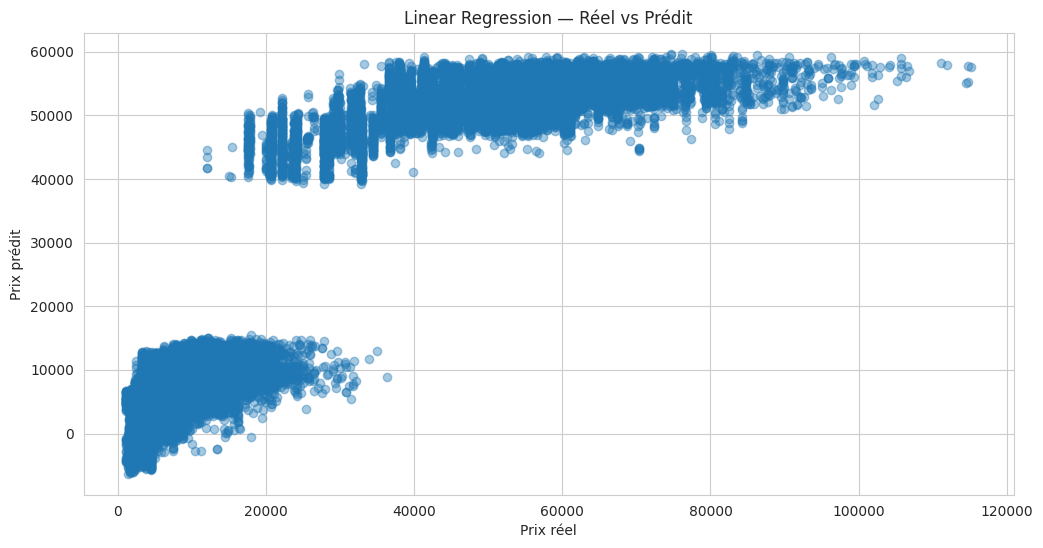

In [67]:
pipeline_lr = Pipeline([
    ("preprocess", preprocessor),
    ("model", LinearRegression())
])

print("\n=== Linear Regression — Cross Validation ===")
result_lr = cross_validate(pipeline_lr, data_train, target_train, cv=5, return_train_score=True)

pipeline_lr.fit(data_train, target_train)
test_score_lr = pipeline_lr.score(data_test, target_test)

print("Train Score (mean):", np.mean(result_lr["train_score"]))
print("Validation Score (mean):", np.mean(result_lr["test_score"]))
print("Test Score:", test_score_lr)

# Visualization
pred_lr = pipeline_lr.predict(data_test)
plt.scatter(target_test, pred_lr, alpha=0.4)
plt.title("Linear Regression — Réel vs Prédit")
plt.xlabel("Prix réel")
plt.ylabel("Prix prédit")
plt.show()

**3.2 Random Forest (Baseline Ensemble Model)**

Test Score: 0.986449642514561


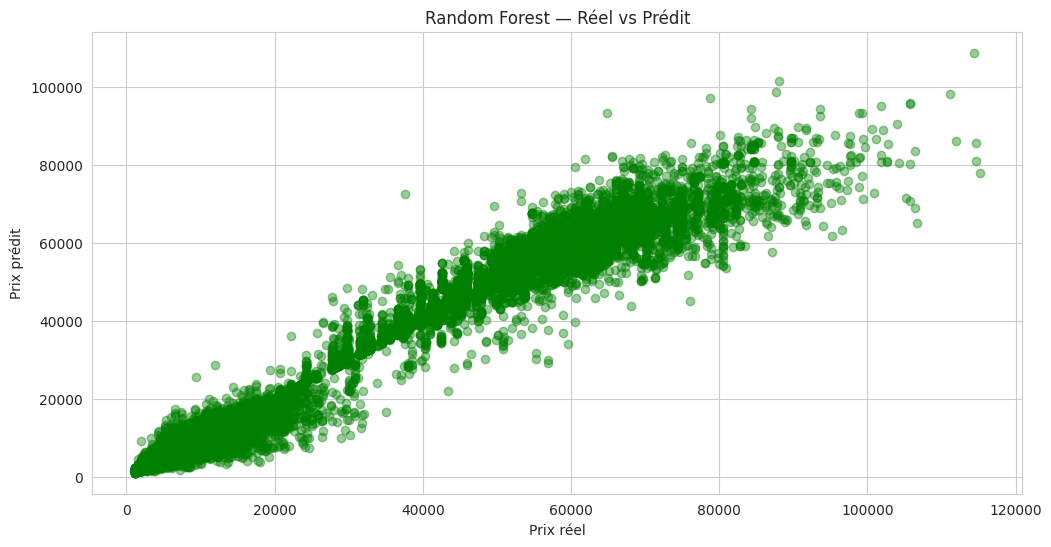

In [76]:
# Preprocessing une seule fois = énorme gain de temps
X_train_proc = preprocessor.fit_transform(data_train)
X_test_proc  = preprocessor.transform(data_test)

rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    n_jobs=-1,
    random_state=42
)

rf.fit(X_train_proc, target_train)
test_score_rf = rf.score(X_test_proc, target_test)

print("Test Score:", test_score_rf)

pred_rf = rf.predict(X_test_proc)

plt.scatter(target_test, pred_rf, alpha=0.4, color="green")
plt.title("Random Forest — Réel vs Prédit")
plt.xlabel("Prix réel")
plt.ylabel("Prix prédit")
plt.show()